In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

def relation(cause_morte):
    morti=pd.read_csv('../csv/Morti_province_definitivo.csv', encoding='utf-8')

    morti.drop(morti.index[(morti["TIPO_DATO15"]=="DEATH")], axis=0, inplace=True)
    morti.drop(morti.index[(morti["Causa iniziale di morte - European Short List"]!=cause_morte)], axis=0, inplace=True)
    morti.drop(morti.index[(morti["Sesso"]!="totale")], axis=0, inplace=True)
    return morti
#morti

In [2]:
def provinces():
    inq_prov=pd.read_csv('../csv/Foglio_Chino.csv', encoding='utf-8', sep=',')
    inq_prov=inq_prov.rename(columns={"Unnamed: 0":"Territorio","Unnamed: 1":"VOTO","2018":"Pm10 2018","Unnamed: 3":"Pm2.5 2018",
    "Unnamed: 4":"NO2 2018","2017":"Pm10 2017","Unnamed: 6":"Pm2.5 2017", "Unnamed: 7":"NO2 2017",
    "2016":"Pm10 2016","Unnamed: 9":"Pm2.5 2016", "Unnamed: 10":"NO2 2016",
    "2015":"Pm10 2015","Unnamed: 12":"Pm2.5 2015", "Unnamed: 13":"NO2 2015",
    "2014":"Pm10 2014","Unnamed: 15":"Pm2.5 2014", "Unnamed: 16":"NO2 2014"})
    
    #skipped first row
    inq_prov=inq_prov.iloc[1:]
    
    
    inq_prov.drop(inq_prov.index[(inq_prov["Pm10 2014"]=="nd")], axis=0, inplace=True)
    inq_prov.drop(inq_prov.index[(inq_prov["Pm2.5 2014"]=="nd")], axis=0, inplace=True)
    inq_prov.drop(inq_prov.index[(inq_prov["NO2 2014"]=="nd")], axis=0, inplace=True)
    inq_prov.drop(inq_prov.index[(inq_prov["Pm10 2015"]=="nd")], axis=0, inplace=True)
    inq_prov.drop(inq_prov.index[(inq_prov["Pm2.5 2015"]=="nd")], axis=0, inplace=True)
    inq_prov.drop(inq_prov.index[(inq_prov["NO2 2015"]=="nd")], axis=0, inplace=True)
    inq_prov.drop(inq_prov.index[(inq_prov["Pm10 2016"]=="nd")], axis=0, inplace=True)
    inq_prov.drop(inq_prov.index[(inq_prov["Pm2.5 2016"]=="nd")], axis=0, inplace=True)
    inq_prov.drop(inq_prov.index[(inq_prov["NO2 2016"]=="nd")], axis=0, inplace=True)
    inq_prov.drop(inq_prov.index[(inq_prov["Pm10 2017"]=="nd")], axis=0, inplace=True)
    inq_prov.drop(inq_prov.index[(inq_prov["Pm2.5 2017"]=="nd")], axis=0, inplace=True)
    inq_prov.drop(inq_prov.index[(inq_prov["NO2 2017"]=="nd")], axis=0, inplace=True)
    inq_prov.drop(inq_prov.index[(inq_prov["Pm10 2018"]=="nd")], axis=0, inplace=True)
    inq_prov.drop(inq_prov.index[(inq_prov["Pm2.5 2018"]=="nd")], axis=0, inplace=True)
    inq_prov.drop(inq_prov.index[(inq_prov["NO2 2018"]=="nd")], axis=0, inplace=True)
    return inq_prov

inq_prov=pd.read_csv('../csv/inq_prov.csv')
inq_prov

,Unnamed: 0,Territorio,VOTO,Pm10 2018,Pm2.5 2018,NO2 2018,Pm10 2017,Pm2.5 2017,NO2 2017,Pm10 2016,Pm2.5 2016,NO2 2016,Pm10 2015,Pm2.5 2015,NO2 2015,Pm10 2014,Pm2.5 2014,NO2 2014
0,2,Alessandria,3,35,22,28,40,26,37,32,21,33,37,24,27,35,22,29
1,4,Aosta,6,17,12,24,20,13,29,18,12,27,20,12,28,20,13,28
2,5,Arezzo,3,21,13,26,22,13,28,22,13,18,27,16,29,24,14,28
3,6,Ascoli Piceno,5,20,12,15,19,13,17,19,13,13,22,12,16,22,12,13
4,11,Benevento,3,26,15,22,28,20,25,35,26,21,35,24,21,44,19,30
5,12,Bergamo,2,29,21,36,37,26,41,32,22,36,36,26,41,29,20,40
6,14,Bologna,1,24,17,36,27,19,36,25,18,42,28,18,50,23,16,43
7,16,Brescia,3,33,23,37,38,27,40,34,26,39,37,24,43,31,25,39
8,18,Cagliari,4,23,9,18,24,13,21,25,14,20,31,13,27,25,14,20
9,21,Caserta,3,24,10,17,26,12,26,40,24,44,36,19,26,26,19,25


In [3]:
def pollution_choose(dataset1, dataset2, pollutant):

    result=pd.merge(dataset1, dataset2, on="Territorio")
    #for i in range (2018, 2019):
        #pollutant_year=pollutant + " "+ str(i)
        #result.sort_values(by=pollutant_year, inplace=True)
        #result.plot.scatter(x=pollutant_year, y="Value")
        #plt.scatter(result[pollutant.], result["Value"])
    plt.scatter((result[pollutant+" 2014"] + result[pollutant+" 2015"] + result[pollutant+" 2016"]
                + result[pollutant+" 2017"] + result[pollutant+" 2018"])/5, result["Value"])  
        
        
    plt.show()
    weather = np.array((result[pollutant+" 2014"]+ result[pollutant+" 2015"]+ result[pollutant+" 2016"]
                +result[pollutant+" 2017"]+result[pollutant+" 2018"])/5)
    pollutant = np.array(result['Value'])
    #Pearson
    print(scipy.stats.pearsonr(weather, pollutant))
    #Spearman
    print(scipy.stats.spearmanr(weather, pollutant))
    #Kendall
    print(scipy.stats.kendalltau(weather, pollutant))


In [4]:
type(inq_prov['Pm10 2018'].iloc[0])

numpy.int64

In [5]:
morti=pd.read_csv('../csv/Morti_province_definitivo.csv', encoding='utf-8')
s=morti['Causa iniziale di morte - European Short List'].unique()
for x in s:
    print(x)

di cui tumori maligni della trachea, dei bronchi e dei polmoni
di cui tumori maligni della prostata
du cui altre malattie ischemiche del cuore
altre malattie del sistema circolatorio
polmonite
altre malattie del sistema nervoso e degli organi di senso
di cui tumori maligni del cervello e del sistema nervoso centrale
di cui leucemia
tumori non maligni (benigni e di comportamento incerto)
di cui altre malattie croniche delle basse vie respiratorie
di cui morbo di hodgkin e linfomi
di cui altri tumori maligni
di cui altri tumori maligni del tessuto linfatico/ematopoietico
malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario
altre malattie del sistema respiratorio
di cui tumori maligni dello stomaco
di cui tumori maligni del pancreas
di cui melanomi maligni della cute
malattia di alzheimer
diabete mellito
di cui tumori maligni del fegato e dei dotti biliari intraepatici
morbo di parkinson
di cui tumori maligni dell'esofago
tubercolosi
di cui tumori ma

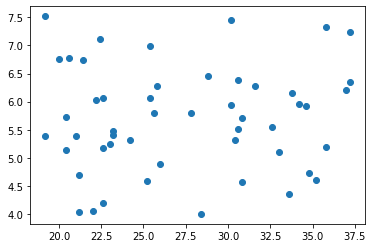

(0.07336093226256475, 0.6126440888061242)
SpearmanrResult(correlation=0.059469199488297535, pvalue=0.6816311880506443)
KendalltauResult(correlation=0.04515654133177158, pvalue=0.64529856335404)


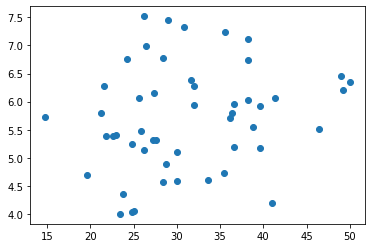

(0.2074967671059657, 0.1482043083955924)
SpearmanrResult(correlation=0.24078967023263703, pvalue=0.09209279784576974)
KendalltauResult(correlation=0.14924250848916423, pvalue=0.1277523386967826)


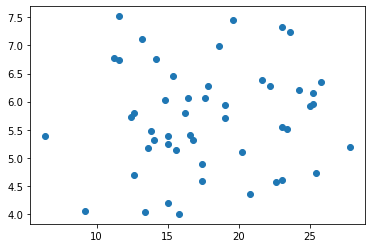

(0.0855363480634555, 0.5547754322291154)
SpearmanrResult(correlation=0.07935440813779945, pvalue=0.5838339457354692)
KendalltauResult(correlation=0.05168214107199357, pvalue=0.5980325794382824)


In [6]:
#di cui tumori maligni della trachea, dei bronchi e dei polmoni #
morti=relation("di cui tumori maligni della trachea, dei bronchi e dei polmoni") #sarebbe utile al posto di mettere un codice, avere la scelta a tendina

pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "NO2")#
pollution_choose(morti, inq_prov, "Pm2.5")

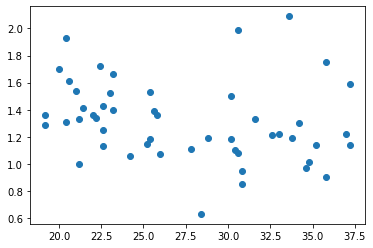

(-0.22672123806816882, 0.11335128758783808)
SpearmanrResult(correlation=-0.3287769980716143, pvalue=0.01974157711148407)
KendalltauResult(correlation=-0.22725449546608273, pvalue=0.020860495858408233)


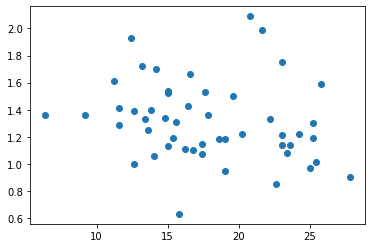

(-0.2033349774987867, 0.15669531811186072)
SpearmanrResult(correlation=-0.29835687655755094, pvalue=0.03533169741091161)
KendalltauResult(correlation=-0.2007405888889574, pvalue=0.04109984551368343)


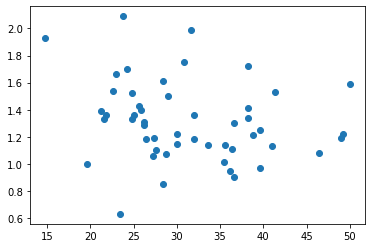

(-0.20952971118591962, 0.14418256396038598)
SpearmanrResult(correlation=-0.23860197000871924, pvalue=0.09517777291538829)
KendalltauResult(correlation=-0.1768092703134807, pvalue=0.07191466043103531)


In [8]:
#di cui tumori maligni della prostata
morti2=relation("di cui tumori maligni della prostata") 
pollution_choose(morti2, inq_prov, "Pm10")
pollution_choose(morti2, inq_prov, "Pm2.5")
pollution_choose(morti2, inq_prov, "NO2")

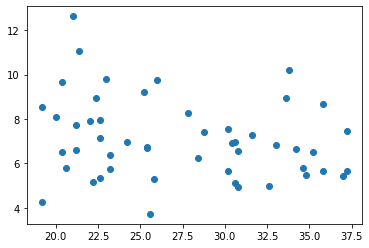

(-0.22727930197183777, 0.11244234758401893)
SpearmanrResult(correlation=-0.22286277573942997, pvalue=0.11978977921412283)
KendalltauResult(correlation=-0.16440720787127014, pvalue=0.09412212150164699)


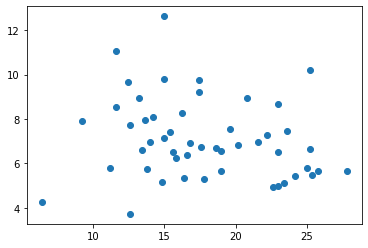

(-0.18659497187476817, 0.19446490835435945)
SpearmanrResult(correlation=-0.2408724102888176, pvalue=0.09197766749512669)
KendalltauResult(correlation=-0.16591444327247803, pvalue=0.0908931609919138)


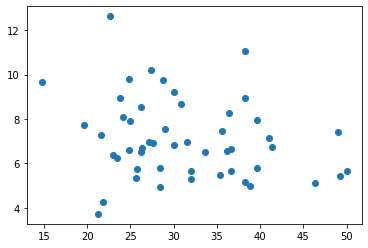

(-0.2158153913790442, 0.13226015150756867)
SpearmanrResult(correlation=-0.18374405724743514, pvalue=0.20149215316292285)
KendalltauResult(correlation=-0.1289002267923541, pvalue=0.18885083676612224)


In [9]:
#du cui altre malattie ischemiche del cuore
morti3=relation("du cui altre malattie ischemiche del cuore") 
pollution_choose(morti3, inq_prov, "Pm10")
pollution_choose(morti3, inq_prov, "Pm2.5")
pollution_choose(morti3, inq_prov, "NO2")

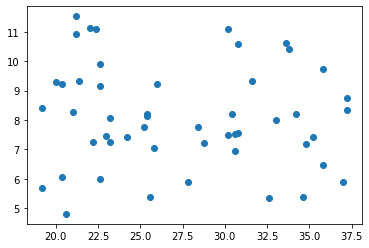

(-0.0898546877111195, 0.5348920723106128)
SpearmanrResult(correlation=-0.1128005599129514, pvalue=0.43542598195635385)
KendalltauResult(correlation=-0.07648067694384002, pvalue=0.43631033675176234)


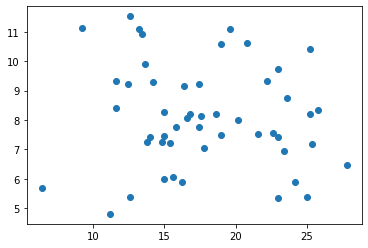

(-0.10216250895053197, 0.4802024521530796)
SpearmanrResult(correlation=-0.12281418366640649, pvalue=0.39549987269720754)
KendalltauResult(correlation=-0.08956477500143462, pvalue=0.3615995126716166)


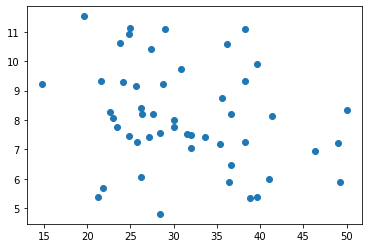

(-0.2637922696279076, 0.06416211736222131)
SpearmanrResult(correlation=-0.27787385598634995, pvalue=0.05072060109881317)
KendalltauResult(correlation=-0.20698195586728044, pvalue=0.03493616938439922)


In [10]:
#altre malattie del sistema circolatorio
morti4=relation("altre malattie del sistema circolatorio") 
pollution_choose(morti4, inq_prov, "Pm10")
pollution_choose(morti4, inq_prov, "Pm2.5")
pollution_choose(morti4, inq_prov, "NO2")

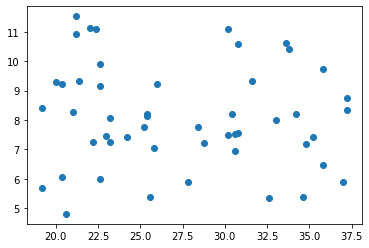

(-0.0898546877111195, 0.5348920723106128)
SpearmanrResult(correlation=-0.1128005599129514, pvalue=0.43542598195635385)
KendalltauResult(correlation=-0.07648067694384002, pvalue=0.43631033675176234)


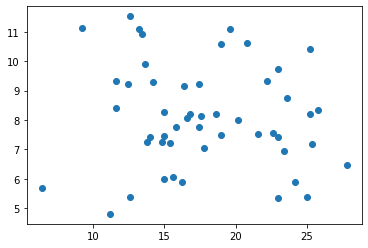

(-0.10216250895053197, 0.4802024521530796)
SpearmanrResult(correlation=-0.12281418366640649, pvalue=0.39549987269720754)
KendalltauResult(correlation=-0.08956477500143462, pvalue=0.3615995126716166)


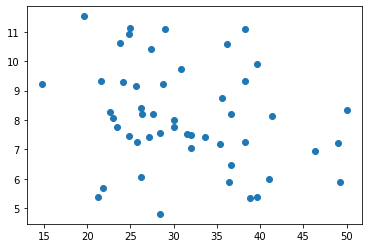

(-0.2637922696279076, 0.06416211736222131)
SpearmanrResult(correlation=-0.27787385598634995, pvalue=0.05072060109881317)
KendalltauResult(correlation=-0.20698195586728044, pvalue=0.03493616938439922)


In [11]:
#altre malattie del sistema circolatorio  
morti5=relation("altre malattie del sistema circolatorio") 
pollution_choose(morti5, inq_prov, "Pm10")
pollution_choose(morti5, inq_prov, "Pm2.5")
pollution_choose(morti5, inq_prov, "NO2")

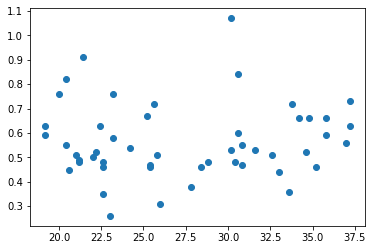

(0.0623707184871142, 0.6669831748473481)
SpearmanrResult(correlation=0.05586942374984955, pvalue=0.6999665540942783)
KendalltauResult(correlation=0.03486991632898894, pvalue=0.7248951296422865)


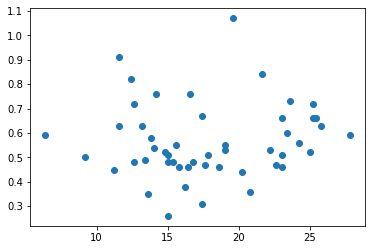

(0.08861129832738539, 0.5405812695294377)
SpearmanrResult(correlation=0.11450071951447585, pvalue=0.4284928829796909)
KendalltauResult(correlation=0.06304594716711276, pvalue=0.5242639993603113)


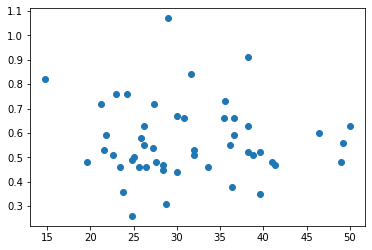

(-0.04087647564586308, 0.7780604729108985)
SpearmanrResult(correlation=0.004399039457992593, pvalue=0.9758124254197952)
KendalltauResult(correlation=-0.012438157301101252, pvalue=0.8999897678656443)


In [12]:
#di cui tumori maligni delle labbra, cavità orale e faringe 
morti6=relation("di cui tumori maligni delle labbra, cavità orale e faringe") 
pollution_choose(morti6, inq_prov, "Pm10")
pollution_choose(morti6, inq_prov, "Pm2.5")
pollution_choose(morti6, inq_prov, "NO2")

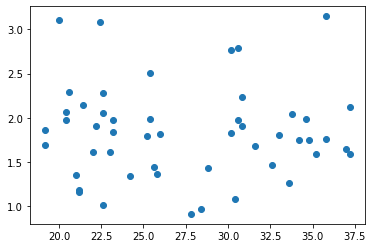

(-0.012563957218647968, 0.9309919134151861)
SpearmanrResult(correlation=-0.061906935849083, pvalue=0.6693164695115752)
KendalltauResult(correlation=-0.04610960777572693, pvalue=0.639214691195907)


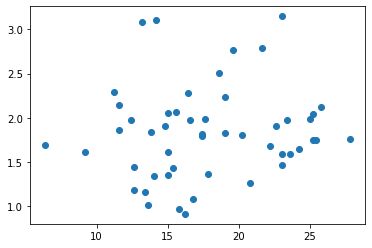

(0.11442078633121099, 0.4288174434567974)
SpearmanrResult(correlation=0.1050494864079042, pvalue=0.46781626934816956)
KendalltauResult(correlation=0.07568907449911509, pvalue=0.44122219208971747)


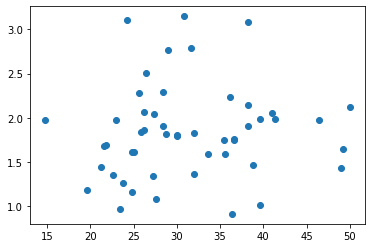

(0.07004813409413821, 0.6288247631058774)
SpearmanrResult(correlation=0.17069421110258323, pvalue=0.23594468031847873)
KendalltauResult(correlation=0.10608556218808841, pvalue=0.2802335735110897)


In [13]:
#altre malattie del sistema nervoso e degli organi di senso #?
morti7=relation("altre malattie del sistema nervoso e degli organi di senso") 
pollution_choose(morti7, inq_prov, "Pm10")
pollution_choose(morti7, inq_prov, "Pm2.5")
pollution_choose(morti7, inq_prov, "NO2")

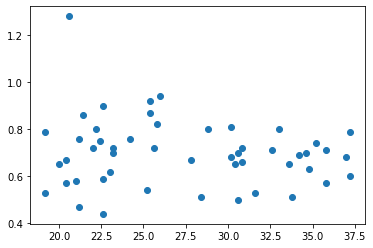

(-0.14276067143769428, 0.3226554942693086)
SpearmanrResult(correlation=-0.07621497463043322, pvalue=0.5988488963979073)
KendalltauResult(correlation=-0.058824034133655036, pvalue=0.5520035778952839)


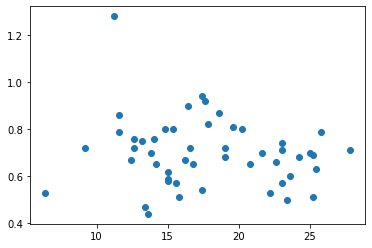

(-0.14926214387658593, 0.30087577099453)
SpearmanrResult(correlation=-0.12435408541539733, pvalue=0.389556193838838)
KendalltauResult(correlation=-0.09023290110784428, pvalue=0.361220717701743)


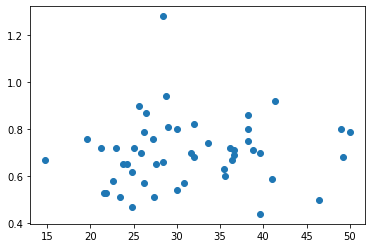

(0.08926184155547896, 0.5376010217987256)
SpearmanrResult(correlation=0.17899975429598539, pvalue=0.21358048717490563)
KendalltauResult(correlation=0.12081267013879578, pvalue=0.22136659014285165)


In [14]:
#di cui tumori maligni del cervello e del sistema nervoso centrale
morti8=relation("di cui tumori maligni del cervello e del sistema nervoso centrale") 
pollution_choose(morti8, inq_prov, "Pm10")
pollution_choose(morti8, inq_prov, "Pm2.5")
pollution_choose(morti8, inq_prov, "NO2")

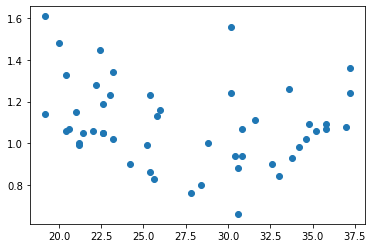

(-0.22325667353768974, 0.1191200572691624)
SpearmanrResult(correlation=-0.1985774722676353, pvalue=0.16683310456258874)
KendalltauResult(correlation=-0.13388448041058923, pvalue=0.1748925340379276)


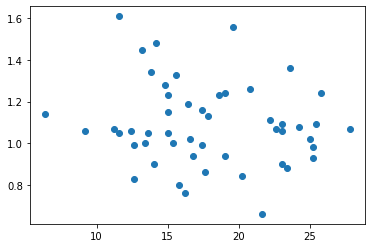

(-0.14511708452159147, 0.3146493269881239)
SpearmanrResult(correlation=-0.09068409672455692, pvalue=0.5311133959943646)
KendalltauResult(correlation=-0.08340240290550828, pvalue=0.3976789658091704)


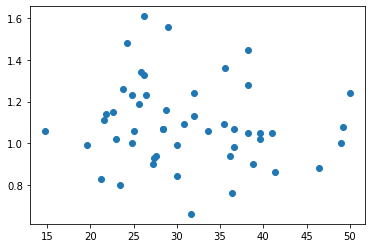

(-0.1146223688053119, 0.4279992041952163)
SpearmanrResult(correlation=-0.1327999262170972, pvalue=0.3579034793339163)
KendalltauResult(correlation=-0.08171722091615993, pvalue=0.4071170085512009)


In [15]:
#di cui leucemia
morti9=relation("di cui leucemia") 
pollution_choose(morti9, inq_prov, "Pm10")
pollution_choose(morti9, inq_prov, "Pm2.5")
pollution_choose(morti9, inq_prov, "NO2")

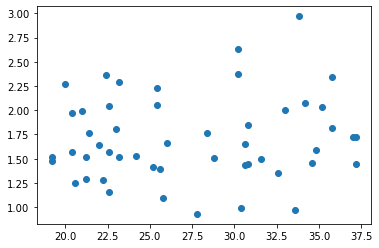

(0.09959909261416151, 0.49134383519569563)
SpearmanrResult(correlation=0.07903144554307184, pvalue=0.5853707161987076)
KendalltauResult(correlation=0.04936260694575923, pvalue=0.6154932531253381)


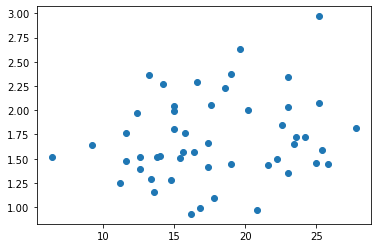

(0.19923609403236991, 0.16540187226635666)
SpearmanrResult(correlation=0.1899351448984927, pvalue=0.18645536331440515)
KendalltauResult(correlation=0.13152514415788893, pvalue=0.18048433714446566)


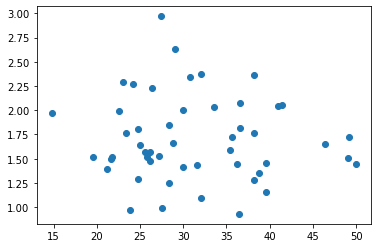

(-0.07404220051788624, 0.6093387907604438)
SpearmanrResult(correlation=-0.02466852432600645, pvalue=0.8649734107790921)
KendalltauResult(correlation=-0.012325406947746247, pvalue=0.9000890868851681)


In [16]:
#tumori non maligni (benigni e di comportamento incerto) 
morti9=relation("tumori non maligni (benigni e di comportamento incerto)") 
pollution_choose(morti9, inq_prov, "Pm10")
pollution_choose(morti9, inq_prov, "Pm2.5")
pollution_choose(morti9, inq_prov, "NO2")

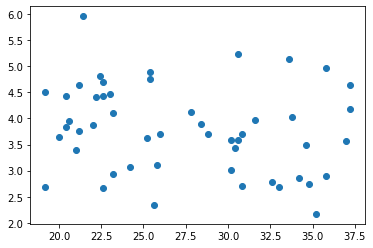

(-0.2026496637229303, 0.15812708403117662)
SpearmanrResult(correlation=-0.19731470291654266, pvalue=0.16960236136501144)
KendalltauResult(correlation=-0.13470363320862128, pvalue=0.16988040763653922)


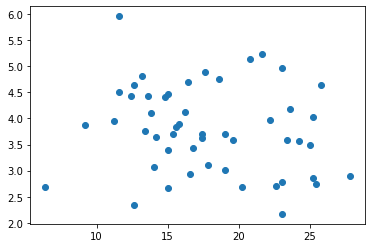

(-0.17682014355745201, 0.2193005884245386)
SpearmanrResult(correlation=-0.2010087736780769, pvalue=0.16159419570182815)
KendalltauResult(correlation=-0.14279949657917582, pvalue=0.14533326339579228)


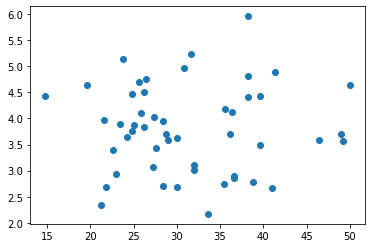

(0.01448590940121168, 0.9204671808443617)
SpearmanrResult(correlation=-0.030765906043321287, pvalue=0.8320325009015618)
KendalltauResult(correlation=-0.020508724031272633, pvalue=0.83428113845307)


In [17]:
#di cui altre malattie croniche delle basse vie respiratorie
morti9=relation("di cui altre malattie croniche delle basse vie respiratorie") 
pollution_choose(morti9, inq_prov, "Pm10")
pollution_choose(morti9, inq_prov, "Pm2.5")
pollution_choose(morti9, inq_prov, "NO2")

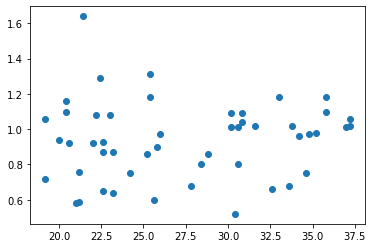

(0.07023701930805969, 0.6278974402487114)
SpearmanrResult(correlation=0.12765241929777166, pvalue=0.37700374520113444)
KendalltauResult(correlation=0.09764211408960552, pvalue=0.32301562343059353)


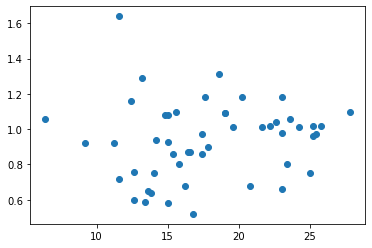

(0.10832322175529181, 0.4539807954433736)
SpearmanrResult(correlation=0.19719325796442047, pvalue=0.16987043909035401)
KendalltauResult(correlation=0.13972812707732696, pvalue=0.15696497991444078)


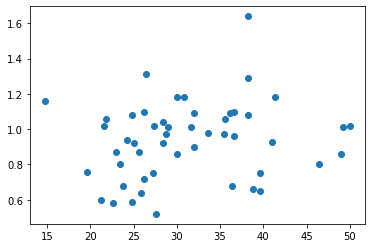

(0.17119824180101367, 0.23454345510778735)
SpearmanrResult(correlation=0.19600635186253706, pvalue=0.17250662471018924)
KendalltauResult(correlation=0.14297642730207677, pvalue=0.14740216323944344)


In [18]:
#di cui morbo di hodgkin e linfomi 
morti=relation("di cui morbo di hodgkin e linfomi") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

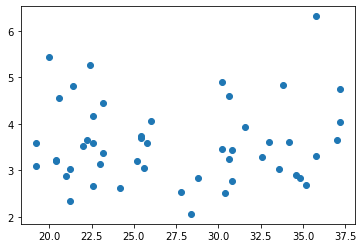

(0.05622648336923257, 0.6981400876951733)
SpearmanrResult(correlation=0.04184180964147281, pvalue=0.772956897190419)
KendalltauResult(correlation=0.022185889791087952, pvalue=0.8212148642960859)


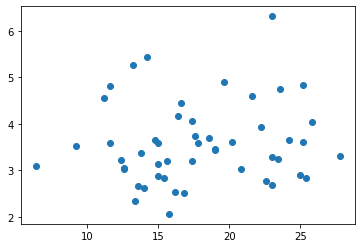

(0.11027008696944547, 0.4458601344686572)
SpearmanrResult(correlation=0.12931738855989397, pvalue=0.3707602200803667)
KendalltauResult(correlation=0.0796391815131875, pvalue=0.41689145021386864)


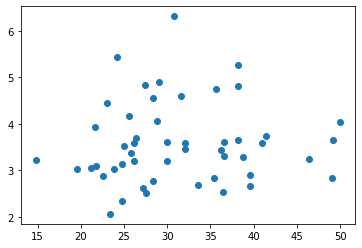

(0.05862032175600669, 0.6859390222913146)
SpearmanrResult(correlation=0.14052743078116436, pvalue=0.3303608235809702)
KendalltauResult(correlation=0.10176488431658905, pvalue=0.2993921555196948)


In [19]:
#di cui altri tumori maligni
morti=relation("di cui altri tumori maligni") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

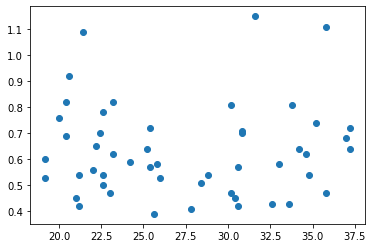

(0.029835486167784447, 0.837042088251885)
SpearmanrResult(correlation=0.00646525866996496, pvalue=0.9644576909178209)
KendalltauResult(correlation=0.0024855225690276774, pvalue=0.9799511616307337)


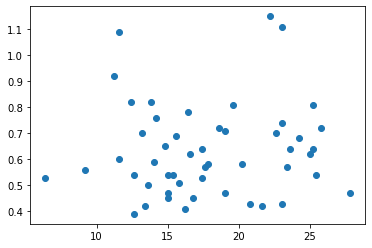

(0.0697789261514714, 0.6301474067823443)
SpearmanrResult(correlation=0.07058739225990733, pvalue=0.6261788074824218)
KendalltauResult(correlation=0.04387471338271328, pvalue=0.6570819334006747)


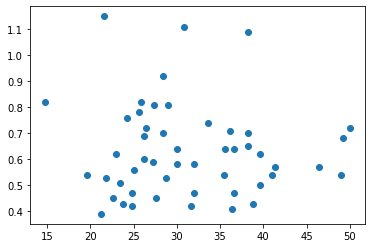

(-0.05042173501480994, 0.7280361886739362)
SpearmanrResult(correlation=0.019538574286696343, pvalue=0.8928673087354331)
KendalltauResult(correlation=0.013239744672744743, pvalue=0.8933918523436144)


In [20]:
#di cui altri tumori maligni del tessuto linfatico/ematopoietico
morti=relation("di cui altri tumori maligni del tessuto linfatico/ematopoietico") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

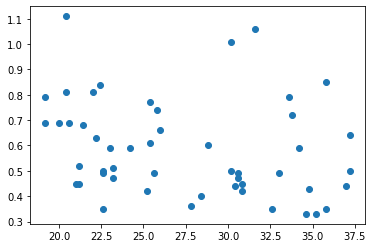

(-0.2515656509546801, 0.07801706564584478)
SpearmanrResult(correlation=-0.33552889307391703, pvalue=0.01721675955572974)
KendalltauResult(correlation=-0.24315762980127079, pvalue=0.01409277391753295)


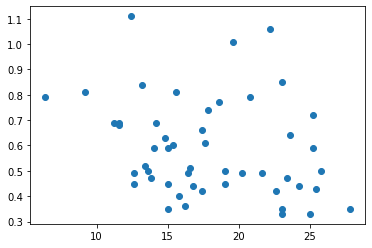

(-0.2643292060455412, 0.0636020369329209)
SpearmanrResult(correlation=-0.3096560652099632, pvalue=0.028646606985770137)
KendalltauResult(correlation=-0.21476426087634823, pvalue=0.030012609464384388)


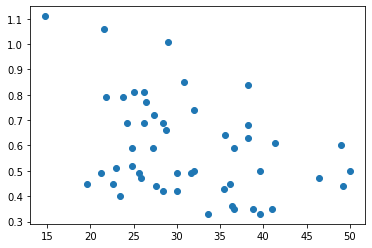

(-0.3746062187553876, 0.007357058240020545)
SpearmanrResult(correlation=-0.31384761573587316, pvalue=0.02645148244642639)
KendalltauResult(correlation=-0.2254510986624651, pvalue=0.022684456970405772)


In [21]:
#malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario
morti=relation("malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

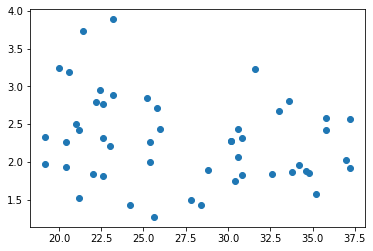

(-0.23662847259325986, 0.09802890817653893)
SpearmanrResult(correlation=-0.2020418005117649, pvalue=0.15940504738627131)
KendalltauResult(correlation=-0.13245632863778725, pvalue=0.1777656156633095)


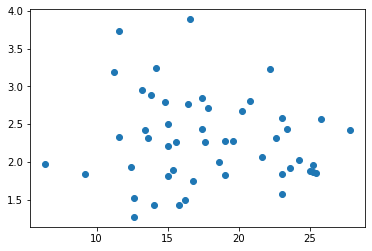

(-0.08680355824637163, 0.5489045865486231)
SpearmanrResult(correlation=-0.06471139386713985, pvalue=0.6552551371215865)
KendalltauResult(correlation=-0.05918631487105003, pvalue=0.5467380309629857)


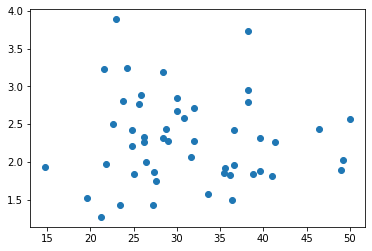

(-0.03987435224966267, 0.7833683711988896)
SpearmanrResult(correlation=-0.0331948216550933, pvalue=0.8189862585158794)
KendalltauResult(correlation=-0.028759282878074575, pvalue=0.7695677231335576)


In [22]:
#altre malattie del sistema respiratorio
morti=relation("altre malattie del sistema respiratorio") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

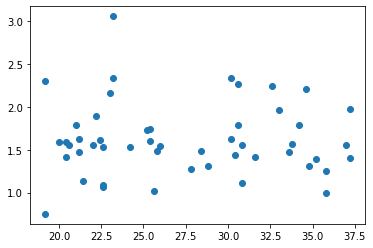

(-0.007360143903602484, 0.9595419584307805)
SpearmanrResult(correlation=-0.05741879691425446, pvalue=0.6920533540385002)
KendalltauResult(correlation=-0.04204453201220739, pvalue=0.6693905419720991)


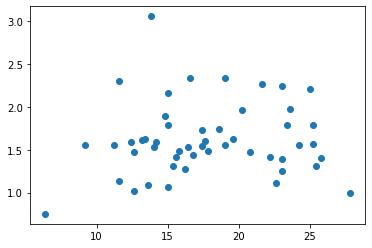

(0.08323945339506225, 0.5654918399413492)
SpearmanrResult(correlation=0.06339939941769501, pvalue=0.6618190155185528)
KendalltauResult(correlation=0.05024711696869852, pvalue=0.609572673830882)


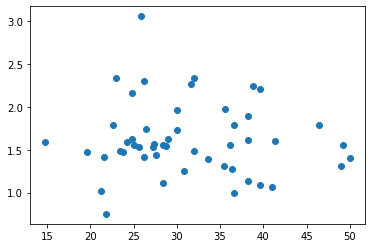

(-0.06900737723027969, 0.6339444518607772)
SpearmanrResult(correlation=-0.039950032442401744, pvalue=0.7829671753004943)
KendalltauResult(correlation=-0.03128859878165255, pvalue=0.7503997947898766)


In [23]:
#di cui tumori maligni dello stomaco
morti=relation("di cui tumori maligni dello stomaco") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

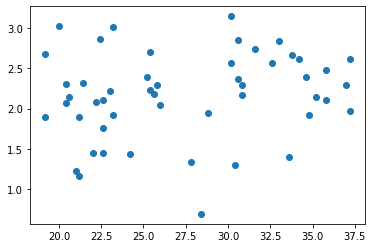

(0.1767100291340874, 0.21959236799602658)
SpearmanrResult(correlation=0.19126090255742795, pvalue=0.1833426390797493)
KendalltauResult(correlation=0.1193419275784468, pvalue=0.2248320747026471)


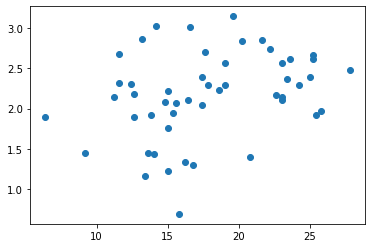

(0.31177155079431873, 0.027520458512725162)
SpearmanrResult(correlation=0.3177516247271104, pvalue=0.024535264735973634)
KendalltauResult(correlation=0.21134897007703352, pvalue=0.03145889777287255)


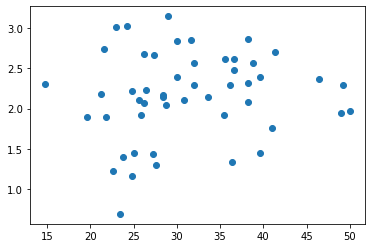

(0.12435079331466292, 0.38956884421988713)
SpearmanrResult(correlation=0.1684521529681434, pvalue=0.24224712027512882)
KendalltauResult(correlation=0.11015215936458461, pvalue=0.2620401512815599)


In [24]:
#di cui tumori maligni del pancreas
morti=relation("di cui tumori maligni del pancreas") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")#########################################
pollution_choose(morti, inq_prov, "NO2")

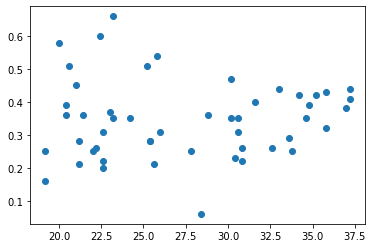

(0.036206605205236955, 0.8028768213283914)
SpearmanrResult(correlation=0.1276693491884567, pvalue=0.37693994502293404)
KendalltauResult(correlation=0.09571734632545909, pvalue=0.33506559620451415)


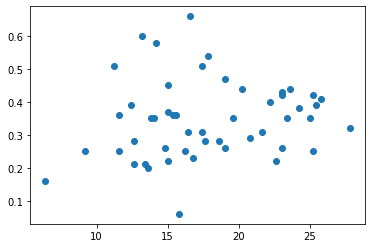

(0.14532401211072743, 0.31395236192109843)
SpearmanrResult(correlation=0.21567882516055342, pvalue=0.1325110671849645)
KendalltauResult(correlation=0.1380520512277328, pvalue=0.16410600716588497)


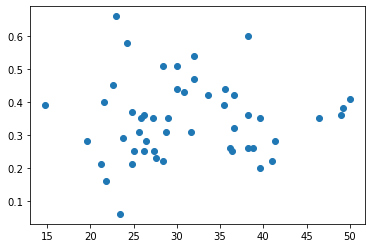

(0.05892549357753342, 0.6843892076436999)
SpearmanrResult(correlation=0.09038886735800973, pvalue=0.5324569170311758)
KendalltauResult(correlation=0.0640098346698685, pvalue=0.5186884286536593)


In [25]:
#di cui melanomi maligni della cute
morti=relation("di cui melanomi maligni della cute") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

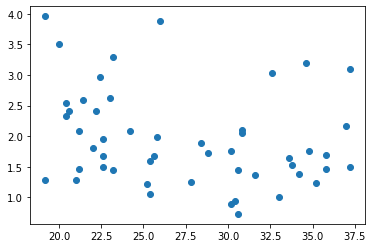

(-0.25746191395328616, 0.07106705657282283)
SpearmanrResult(correlation=-0.24607293139135475, pvalue=0.08496330683831943)
KendalltauResult(correlation=-0.1708436323621538, pvalue=0.08171100604808437)


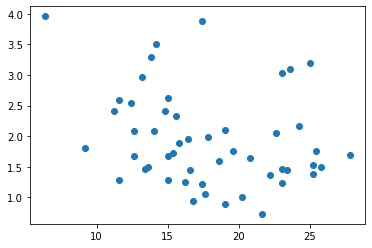

(-0.26599224566903323, 0.061892089882312734)
SpearmanrResult(correlation=-0.2676354122469603, pvalue=0.06023895374454458)
KendalltauResult(correlation=-0.180551087628843, pvalue=0.06559356460471018)


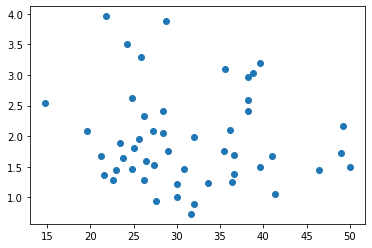

(-0.09001357373360254, 0.5341671935027128)
SpearmanrResult(correlation=-0.06760813857295037, pvalue=0.6408543747735669)
KendalltauResult(correlation=-0.04183779702379617, pvalue=0.6695274258889844)


In [7]:
#malattia di alzheimer
morti=relation("malattia di alzheimer") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

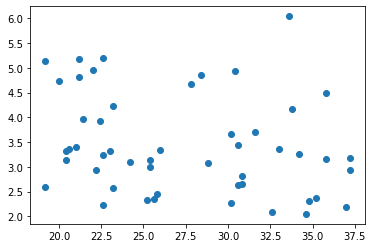

(-0.237267911995223, 0.09709795852536401)
SpearmanrResult(correlation=-0.29287860200335225, pvalue=0.03900953407991465)
KendalltauResult(correlation=-0.19294158569029674, pvalue=0.04921200693979207)


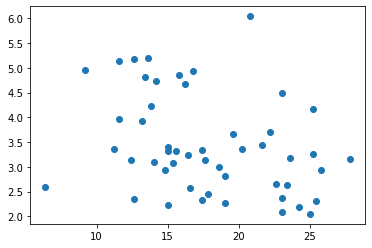

(-0.32193724881562424, 0.022611564762648396)
SpearmanrResult(correlation=-0.361802301509628, pvalue=0.009830535388817549)
KendalltauResult(correlation=-0.2518478937952703, pvalue=0.010193088105063997)


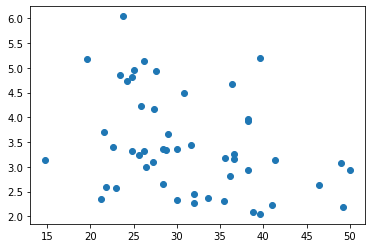

(-0.3505307194588614, 0.012571653488346273)
SpearmanrResult(correlation=-0.3793650140629099, pvalue=0.006586569908903905)
KendalltauResult(correlation=-0.2689645207936586, pvalue=0.0060549055209752015)


In [26]:
#diabete mellito
morti=relation("diabete mellito") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

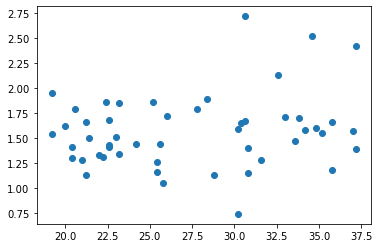

(0.2009858162813122, 0.1616430944732239)
SpearmanrResult(correlation=0.12702683405220788, pvalue=0.3793657781702565)
KendalltauResult(correlation=0.07654344320548656, pvalue=0.43627853389134996)


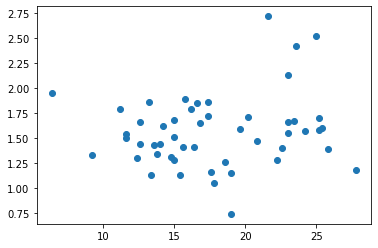

(0.16565617508971836, 0.25026599052386533)
SpearmanrResult(correlation=0.10096084659268559, pvalue=0.48540856639410235)
KendalltauResult(correlation=0.05838823686953066, pvalue=0.5523076608266351)


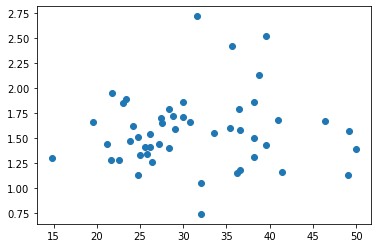

(0.05563955015793487, 0.7011433166662807)
SpearmanrResult(correlation=0.050538047888916825, pvalue=0.7274330174709442)
KendalltauResult(correlation=0.04603373824191596, pvalue=0.6392691516026039)


In [27]:
#di cui tumori maligni del fegato e dei dotti biliari intraepatici
morti=relation("di cui tumori maligni del fegato e dei dotti biliari intraepatici") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

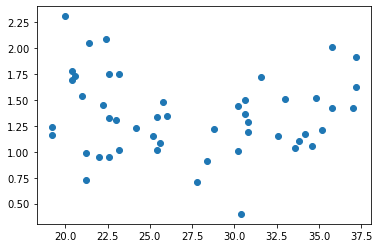

(-0.06625988880858591, 0.6475411412560914)
SpearmanrResult(correlation=-0.04222814828087065, pvalue=0.7709170306423847)
KendalltauResult(correlation=-0.01562508453691355, pvalue=0.8736405925793505)


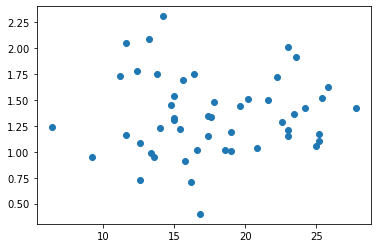

(0.03631946235044241, 0.8022747000336915)
SpearmanrResult(correlation=0.044220792515128955, pvalue=0.7604205044666433)
KendalltauResult(correlation=0.04026306399147061, pvalue=0.6817133979154377)


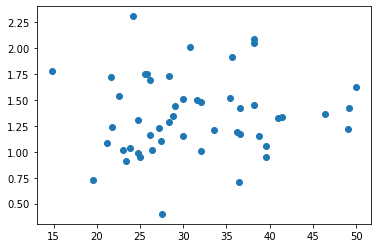

(0.07296669467199879, 0.6145603021716184)
SpearmanrResult(correlation=0.1025844272553981, pvalue=0.4783815393894999)
KendalltauResult(correlation=0.0739221270954573, pvalue=0.45130024183456874)


In [28]:
#morbo di parkinson
morti=relation("morbo di parkinson") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

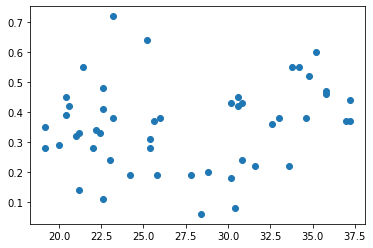

(0.1696923106815993, 0.23874700451492445)
SpearmanrResult(correlation=0.22324778553251734, pvalue=0.11913513763623819)
KendalltauResult(correlation=0.13924719904552615, pvalue=0.15930810427997033)


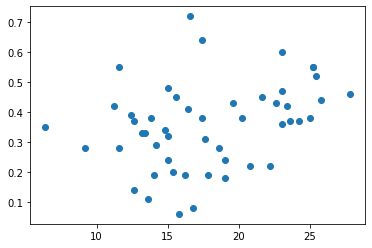

(0.32067910770865954, 0.023175980632629163)
SpearmanrResult(correlation=0.35034254344269866, pvalue=0.0126224770677553)
KendalltauResult(correlation=0.22277755485080863, pvalue=0.02423287217830661)


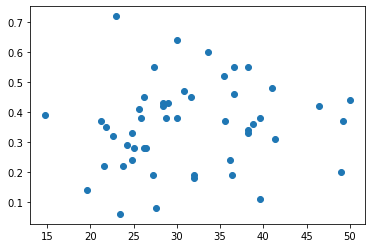

(0.11696789081646003, 0.41854345562864764)
SpearmanrResult(correlation=0.19268394792092192, pvalue=0.18004317188723276)
KendalltauResult(correlation=0.13162472645996187, pvalue=0.1829034444982146)


In [29]:
#di cui tumori maligni dell'esofago  
morti=relation("di cui tumori maligni dell'esofago") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")#
pollution_choose(morti, inq_prov, "NO2")

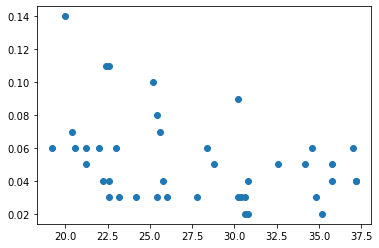

(-0.3812497415542594, 0.013917851237957251)
SpearmanrResult(correlation=-0.4022862629086518, pvalue=0.009122748905535204)
KendalltauResult(correlation=-0.29253353864109266, pvalue=0.011197795769875991)


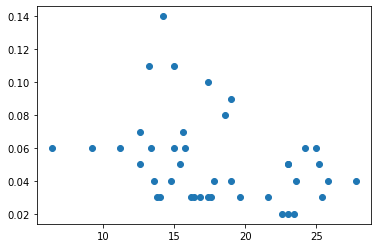

(-0.32504499726567937, 0.03811459756306291)
SpearmanrResult(correlation=-0.3574034844585819, pvalue=0.02178584595682576)
KendalltauResult(correlation=-0.2512194694475686, pvalue=0.029116658497381674)


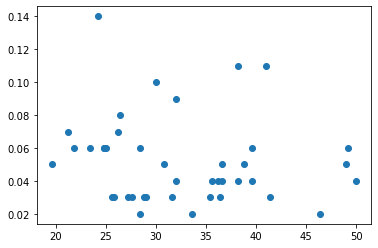

(-0.14300251224177593, 0.3724239886407658)
SpearmanrResult(correlation=-0.19190416902355087, pvalue=0.22936499130942453)
KendalltauResult(correlation=-0.10252920735253748, pvalue=0.3729555877379973)


In [30]:
#tubercolosi
morti=relation("tubercolosi") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

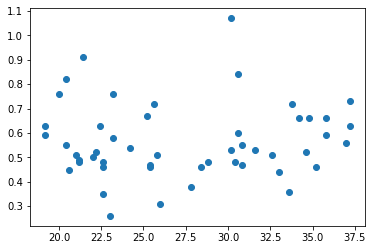

(0.0623707184871142, 0.6669831748473481)
SpearmanrResult(correlation=0.05586942374984955, pvalue=0.6999665540942783)
KendalltauResult(correlation=0.03486991632898894, pvalue=0.7248951296422865)


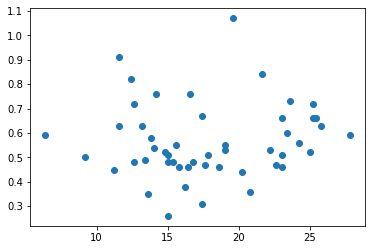

(0.08861129832738539, 0.5405812695294377)
SpearmanrResult(correlation=0.11450071951447585, pvalue=0.4284928829796909)
KendalltauResult(correlation=0.06304594716711276, pvalue=0.5242639993603113)


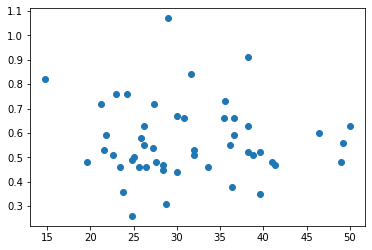

(-0.04087647564586308, 0.7780604729108985)
SpearmanrResult(correlation=0.004399039457992593, pvalue=0.9758124254197952)
KendalltauResult(correlation=-0.012438157301101252, pvalue=0.8999897678656443)


In [31]:
#di cui tumori maligni delle labbra, cavità orale e faringe
morti=relation("di cui tumori maligni delle labbra, cavità orale e faringe") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

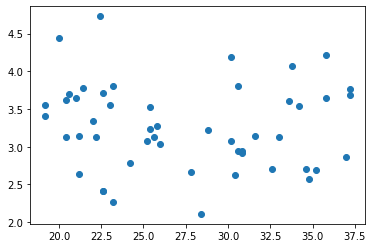

(-0.07100024095090471, 0.6241562426689709)
SpearmanrResult(correlation=-0.10968284491279864, pvalue=0.4483011296362984)
KendalltauResult(correlation=-0.08494846083098859, pvalue=0.38844994071714367)


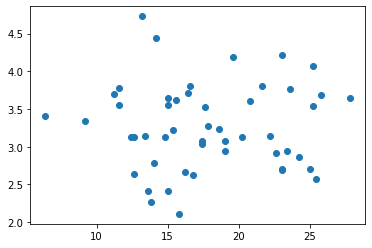

(0.010545566459435357, 0.9420573118304035)
SpearmanrResult(correlation=0.004132529262795293, pvalue=0.9772774027189937)
KendalltauResult(correlation=-0.008240626987102703, pvalue=0.9332731813103752)


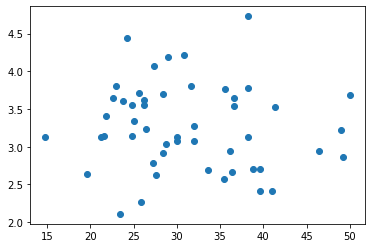

(-0.07885291648646955, 0.586221000766101)
SpearmanrResult(correlation=-0.12014991798003002, pvalue=0.40590776053552846)
KendalltauResult(correlation=-0.0716639452352827, pvalue=0.4663773450873099)


In [32]:
#di cui tumori maligni del colon, del retto e dell'ano
morti=relation("di cui tumori maligni del colon, del retto e dell'ano") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

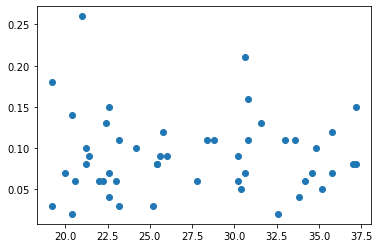

(-0.01617071543393292, 0.9112520977917528)
SpearmanrResult(correlation=0.06248680056820806, pvalue=0.6663996514622796)
KendalltauResult(correlation=0.0482598406913115, pvalue=0.6318216795245605)


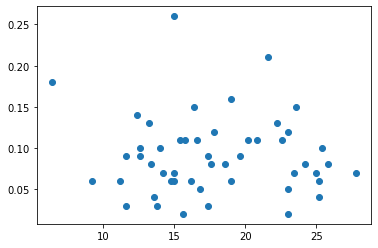

(-0.056731713285090045, 0.6955585779587837)
SpearmanrResult(correlation=0.013789194142204772, pvalue=0.9242809741813417)
KendalltauResult(correlation=0.00845966167603044, pvalue=0.9330084729982759)


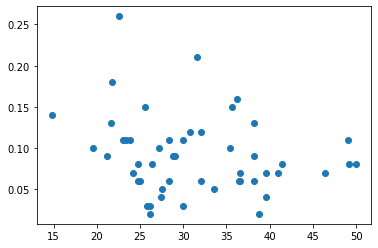

(-0.20830503515006193, 0.14659550184295314)
SpearmanrResult(correlation=-0.2257992583563652, pvalue=0.11486521536256328)
KendalltauResult(correlation=-0.13276201998935594, pvalue=0.18694446462366043)


In [33]:
#di cui tumori maligni della cervice uterina
morti=relation("di cui tumori maligni della cervice uterina") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

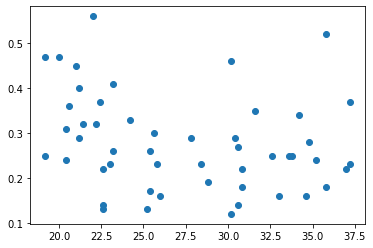

(-0.24162677015970555, 0.09093315499695398)
SpearmanrResult(correlation=-0.2902202701766199, pvalue=0.04090449987322474)
KendalltauResult(correlation=-0.19684819925546065, pvalue=0.04704145093638723)


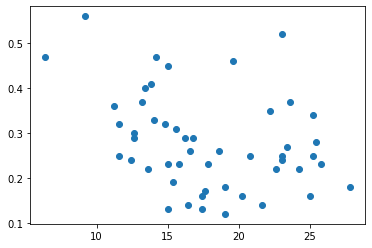

(-0.33057472781857566, 0.019040539590606514)
SpearmanrResult(correlation=-0.3371157283945438, pvalue=0.016664916330766014)
KendalltauResult(correlation=-0.2282221333140311, pvalue=0.021209096447475657)


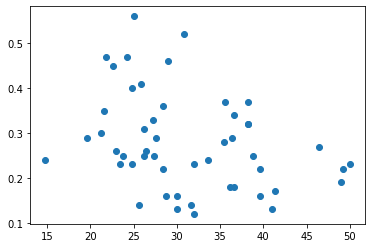

(-0.32126663928063554, 0.022910950688558484)
SpearmanrResult(correlation=-0.36339824691413564, pvalue=0.00948754759770041)
KendalltauResult(correlation=-0.2347646520015688, pvalue=0.017733449168990452)


In [34]:
#di cui tumori maligni della laringe
morti=relation("di cui tumori maligni della laringe") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

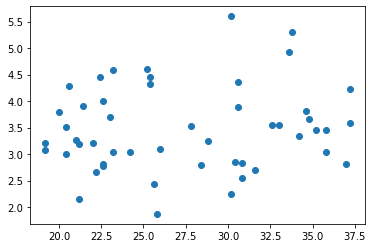

(0.1264770560835417, 0.3814488433153545)
SpearmanrResult(correlation=0.09502306192646584, pvalue=0.5115618628128284)
KendalltauResult(correlation=0.06576288314850805, pvalue=0.503111781751281)


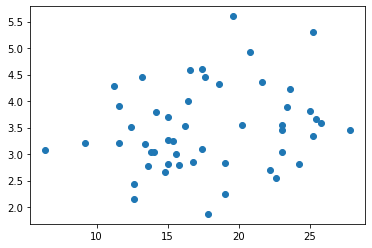

(0.20309672659981504, 0.15719199137295284)
SpearmanrResult(correlation=0.20704729905153887, pvalue=0.14910457732157903)
KendalltauResult(correlation=0.13306009807000715, pvalue=0.17513726797759088)


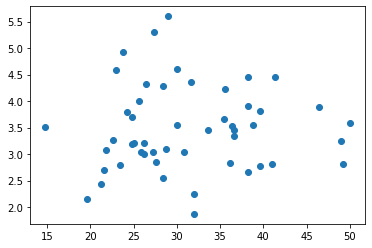

(0.03245881958768816, 0.8229345371202385)
SpearmanrResult(correlation=0.10205356214850811, pvalue=0.48067323779800075)
KendalltauResult(correlation=0.06486062367258583, pvalue=0.5085082032122803)


In [35]:
#di cui infarto miocardico acuto
morti=relation("di cui infarto miocardico acuto") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")#
pollution_choose(morti, inq_prov, "NO2")

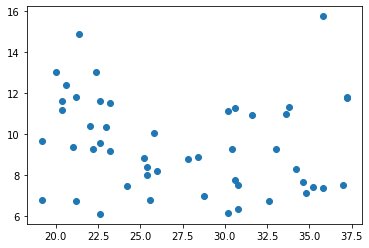

(-0.15228511629996144, 0.29107995011022764)
SpearmanrResult(correlation=-0.20706634861150508, pvalue=0.1490663398806256)
KendalltauResult(correlation=-0.1626299961908964, pvalue=0.09748932472529553)


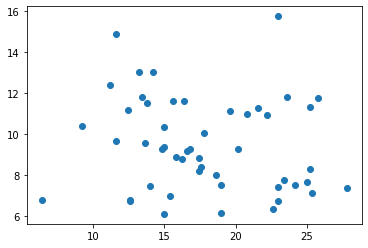

(-0.1324673606738212, 0.3591193652334336)
SpearmanrResult(correlation=-0.17768704835349655, pvalue=0.2170128888035557)
KendalltauResult(correlation=-0.1395167495313787, pvalue=0.15481196138738665)


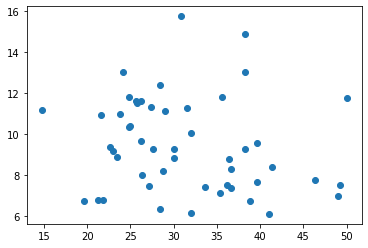

(-0.17126407777068195, 0.23436085086173492)
SpearmanrResult(correlation=-0.17758244284490055, pvalue=0.21728804976322144)
KendalltauResult(correlation=-0.1271540889938903, pvalue=0.19458743768570708)


In [36]:
#malattie cerebrovascolari
morti=relation("malattie cerebrovascolari") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

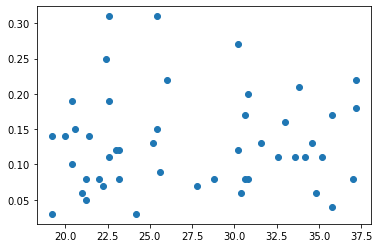

(0.04329738927610747, 0.7701314609075572)
SpearmanrResult(correlation=0.08501451913142637, pvalue=0.5656201907712395)
KendalltauResult(correlation=0.06111220988661938, pvalue=0.5499975095348735)


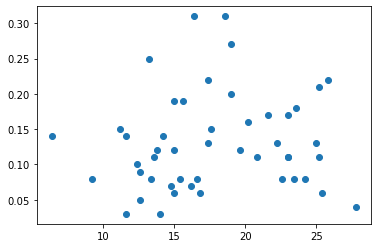

(0.09468808543291059, 0.5220642666188479)
SpearmanrResult(correlation=0.1400809587640672, pvalue=0.34230522785275863)
KendalltauResult(correlation=0.08930794756259518, pvalue=0.38195610265083857)


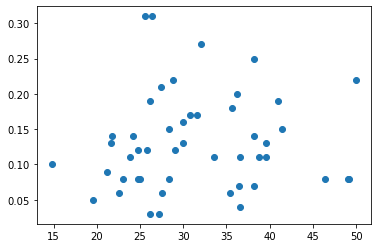

(0.06130561749941785, 0.6789242394766252)
SpearmanrResult(correlation=0.13389080904708509, pvalue=0.3642665907958913)
KendalltauResult(correlation=0.09742251884373167, pvalue=0.3398343555634622)


In [37]:
#influenza  
morti=relation("influenza") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

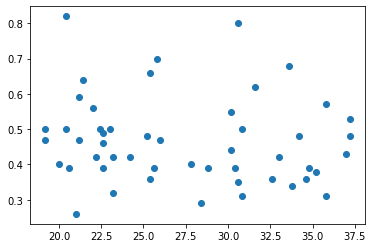

(-0.11591032886278252, 0.4227920907369251)
SpearmanrResult(correlation=-0.15980480120050533, pvalue=0.26762329442509447)
KendalltauResult(correlation=-0.12025933828835465, pvalue=0.22707795302702338)


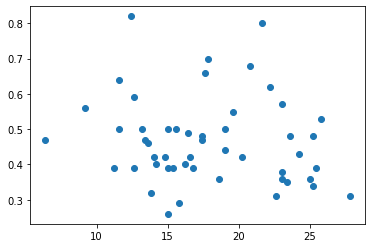

(-0.13850135099571115, 0.3374502938935634)
SpearmanrResult(correlation=-0.17019608546508777, pvalue=0.2373351126048057)
KendalltauResult(correlation=-0.11849134486389884, pvalue=0.2336180612633133)


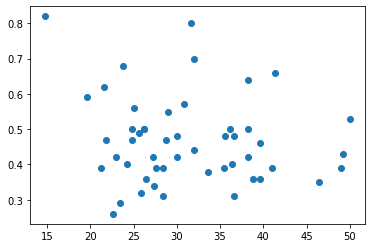

(-0.1472863641252765, 0.3073917796126266)
SpearmanrResult(correlation=-0.08965363299980861, pvalue=0.5358100235392402)
KendalltauResult(correlation=-0.05671897859871817, pvalue=0.5684412590326511)


In [39]:
#di cui tumori maligni di altre parti dell'utero
morti=relation("di cui tumori maligni di altre parti dell'utero") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

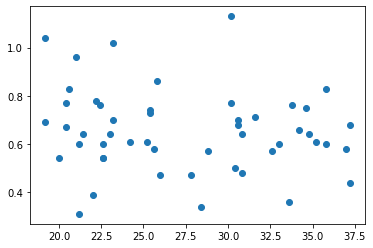

(-0.14386350449825697, 0.31889262112954997)
SpearmanrResult(correlation=-0.1451442510660776, pvalue=0.31455776961910337)
KendalltauResult(correlation=-0.10037474820797868, pvalue=0.3106864793839639)


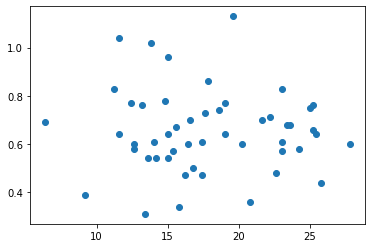

(-0.039198130489554325, 0.7869556230601698)
SpearmanrResult(correlation=-0.02237927314939263, pvalue=0.8774030643804673)
KendalltauResult(correlation=-0.014919476000587588, pvalue=0.8801304832373357)


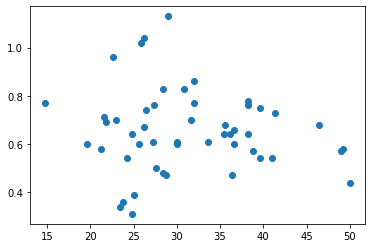

(-0.09585893785791527, 0.5078376383450022)
SpearmanrResult(correlation=-0.04540538761775785, pvalue=0.7542005385344664)
KendalltauResult(correlation=-0.03728333758674101, pvalue=0.7061827070328833)


In [40]:
#di cui tumori maligni del rene
morti=relation("di cui tumori maligni del rene") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

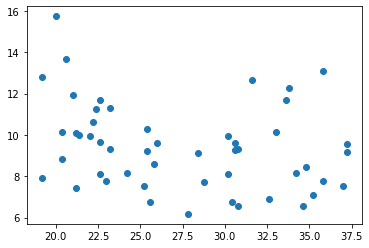

(-0.27259396791133245, 0.05546418456444365)
SpearmanrResult(correlation=-0.2956478001460406, pvalue=0.0371129219790355)
KendalltauResult(correlation=-0.20862635874993782, pvalue=0.03351676779495441)


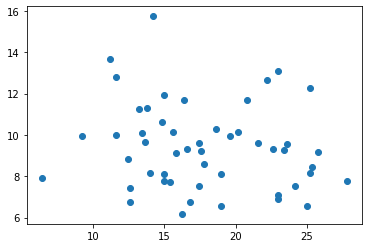

(-0.15221855178255989, 0.29129338716577774)
SpearmanrResult(correlation=-0.1788399245796344, pvalue=0.21399636200220631)
KendalltauResult(correlation=-0.11982026724459578, pvalue=0.22175250230971466)


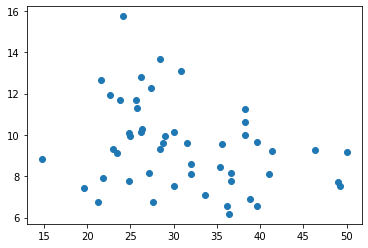

(-0.3017611182657543, 0.03319413772100622)
SpearmanrResult(correlation=-0.2862598236770854, pvalue=0.04386717137186811)
KendalltauResult(correlation=-0.2026261934289736, pvalue=0.03873086604089061)


In [41]:
#altre malattie del cuore
morti=relation("altre malattie del cuore") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

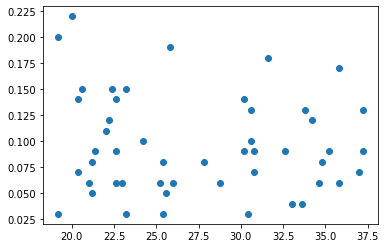

(-0.09931409597095539, 0.4971800675933961)
SpearmanrResult(correlation=-0.06604171993721551, pvalue=0.6520972241515577)
KendalltauResult(correlation=-0.04245731577017847, pvalue=0.67725646008805)


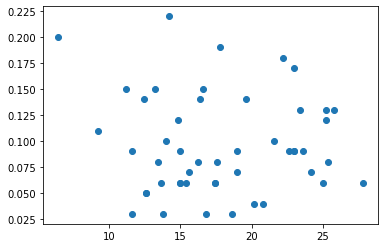

(-0.05231852244060557, 0.7210768245176014)
SpearmanrResult(correlation=0.022662806719270328, pvalue=0.8771649830554268)
KendalltauResult(correlation=0.022977963703307416, pvalue=0.8216395054576338)


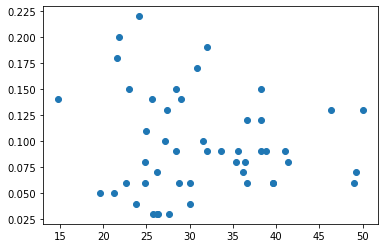

(-0.08474425872876747, 0.5626303506021635)
SpearmanrResult(correlation=0.008228947486098618, pvalue=0.9552489886062617)
KendalltauResult(correlation=-0.0017667775585047897, pvalue=0.9861651762340126)


In [42]:
#di cui tumori maligni della tiroide
morti=relation("di cui tumori maligni della tiroide") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

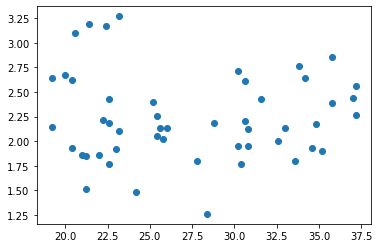

(-0.017189595795895057, 0.9056848353794864)
SpearmanrResult(correlation=0.032673457658320526, pvalue=0.8217826594378934)
KendalltauResult(correlation=0.027205285419663605, pvalue=0.7823298247866014)


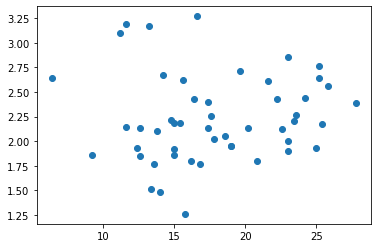

(0.07031750787942125, 0.6275024581712806)
SpearmanrResult(correlation=0.15464264268726896, pvalue=0.28358628846094674)
KendalltauResult(correlation=0.11037891268533773, pvalue=0.26193498395315373)


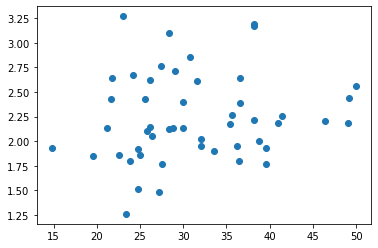

(0.1462630725198754, 0.31080182579660776)
SpearmanrResult(correlation=0.1938165133766069, pvalue=0.17744790720225184)
KendalltauResult(correlation=0.13668177362511374, pvalue=0.16463572172185392)


In [43]:
#di cui tumori maligni del seno
morti=relation("di cui tumori maligni del seno") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

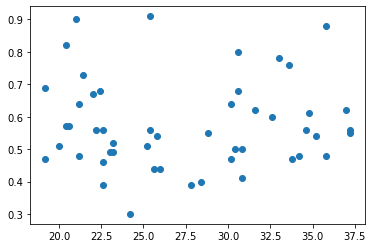

(0.023644362456870488, 0.8705303565289707)
SpearmanrResult(correlation=-0.025602812518756363, pvalue=0.8599097322396565)
KendalltauResult(correlation=-0.014108121865602742, pvalue=0.8867294006619455)


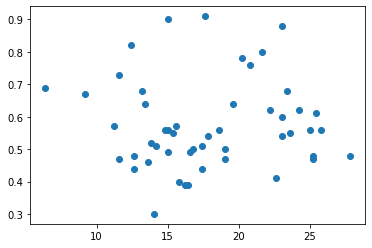

(0.009865721444460254, 0.9457869610810774)
SpearmanrResult(correlation=0.017597003293007833, pvalue=0.9034599612604121)
KendalltauResult(correlation=0.014096495887636756, pvalue=0.8867344937779766)


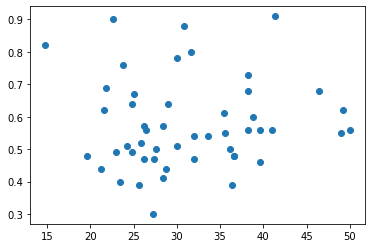

(0.04059243559235666, 0.7795639275194587)
SpearmanrResult(correlation=0.09961540717989788, pvalue=0.491272504765516)
KendalltauResult(correlation=0.07708438299856343, pvalue=0.4358786391910905)


In [44]:
#di cui tumori maligni dell'ovaio
morti=relation("di cui tumori maligni dell'ovaio") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")

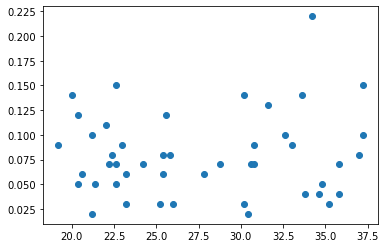

(0.088191243403976, 0.5600155522551955)
SpearmanrResult(correlation=0.010468680762437208, pvalue=0.9449499259962568)
KendalltauResult(correlation=0.019083847787705117, pvalue=0.8564653463407084)


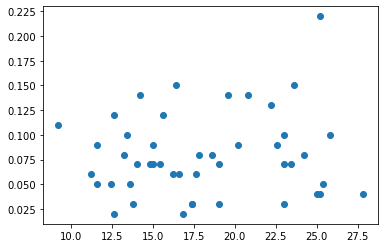

(0.10957236883102092, 0.46851896679292243)
SpearmanrResult(correlation=0.05577790101591485, pvalue=0.7127391358715585)
KendalltauResult(correlation=0.05017168019185773, pvalue=0.6341116648444887)


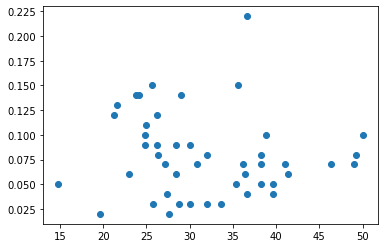

(-0.0783502263124997, 0.6047586278770285)
SpearmanrResult(correlation=-0.15089301437721664, pvalue=0.3168327447496435)
KendalltauResult(correlation=-0.09236091271714439, pvalue=0.38114920483731496)


In [45]:
#di cui asma
morti=relation("di cui asma") 
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "Pm2.5")
pollution_choose(morti, inq_prov, "NO2")